In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [0]:
train=pd.read_csv('train.csv')
original_train=train.copy()
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


In [0]:
test=pd.read_csv('test.csv')
original_test=test.copy()
test.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,2,6966,Short Term,673.0,1 year,Home Mortgage,54736.0,Home Improvements,839.28,16.4,8.0,6,0,2942,3881,0.0,0.0,NaN
1,6,9848,Short Term,NaN,6 years,Rent,NaN,Debt Consolidation,605.65,18.8,NaN,6,0,6957,8568,0.0,0.0,NaN
2,9,99999999,Short Term,724.0,3 years,Rent,27462.0,Debt Consolidation,338.69,10.8,NaN,10,0,11773,15369,0.0,0.0,NaN
3,12,6737,Short Term,NaN,3 years,Rent,NaN,Debt Consolidation,506.38,5.7,NaN,9,0,5841,10856,0.0,0.0,NaN
4,14,5878,Short Term,743.0,less than 1 year,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,5.0,14,0,35963,89459,0.0,0.0,NaN


In [0]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [0]:
sumtrain=0
x=0
y=0
sumtest=0

In [0]:
for i in train['Current.Loan.Amount']:
  if i!=99999999:
    sumtrain=sumtrain+i
    x=x+1

In [0]:
y=0
sumtest=0

In [0]:
for i in test['Current.Loan.Amount']:
  if i!=99999999:
    sumtest=sumtest+i
    y=y+1

In [0]:
train=train.replace(to_replace =99999999, 
                 value =14124) 

In [0]:
test=test.replace(to_replace =99999999, 
                 value =14172) 

In [0]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [0]:
creditsum=0
y=0

In [0]:
for i in train['Credit.Score']:
  if i<900:
    creditsum=creditsum+i
    y=y+1

In [0]:
for i in test['Credit.Score']:
  if i<900:
    creditsum=creditsum+i
    y=y+1

In [0]:
creditsum

12561853.0

In [0]:
y

17507

In [0]:
creditsumaverage=creditsum/y

In [0]:
creditsumaverage

717.5331581653053

In [0]:
for i in train['Credit.Score']:
  if i>=900:
    train['Credit.Score']=train['Credit.Score'].replace(to_replace =i, 
                 value =717) 


In [0]:
for i in test['Credit.Score']:
  if i>=900:
    test['Credit.Score']=test['Credit.Score'].replace(to_replace =i, 
                 value =717) 

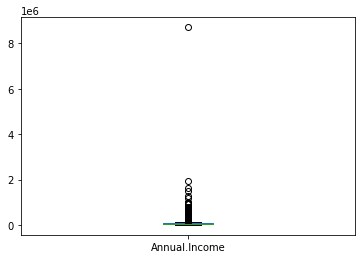

In [0]:
train['Annual.Income'].plot.box()

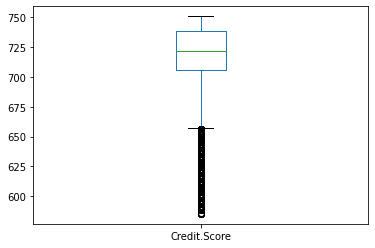

In [0]:
test['Credit.Score'].plot.box()

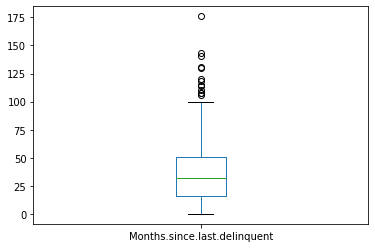

In [0]:
train['Months.since.last.delinquent'].plot.box()

In [0]:
train['Credit.Score'].fillna(train['Credit.Score'].mean(), inplace=True)
train['Annual.Income'].fillna(train['Annual.Income'].median(), inplace=True)
train['Months.since.last.delinquent'].fillna(train['Months.since.last.delinquent'].median(), inplace=True)
train['Years.in.current.job'].fillna(train['Years.in.current.job'].mode()[0], inplace=True)
train['Bankruptcies'].fillna(train['Bankruptcies'].mode()[0], inplace=True)
train['Tax.Liens'].fillna(train['Tax.Liens'].mode()[0], inplace=True)

In [0]:
test['Credit.Score'].fillna(test['Credit.Score'].mean(), inplace=True)
test['Annual.Income'].fillna(test['Annual.Income'].median(), inplace=True)
test['Months.since.last.delinquent'].fillna(test['Months.since.last.delinquent'].median(), inplace=True)
test['Years.in.current.job'].fillna(test['Years.in.current.job'].mode()[0], inplace=True)
test['Bankruptcies'].fillna(test['Bankruptcies'].mode()[0], inplace=True)
test['Tax.Liens'].fillna(test['Tax.Liens'].mode()[0], inplace=True)

In [0]:
test.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                        0
Years.in.current.job                0
Home.Ownership                      0
Annual.Income                       0
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent        0
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                        0
Tax.Liens                           0
Loan.Status                     23386
dtype: int64

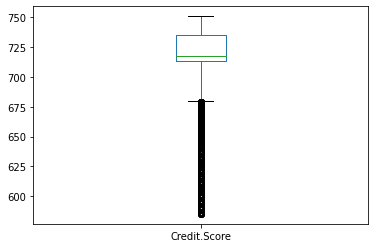

In [0]:
train['Credit.Score'].plot.box()

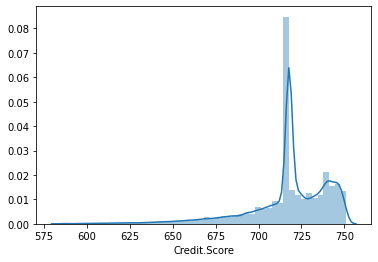

In [0]:
sns.distplot(train['Credit.Score'])

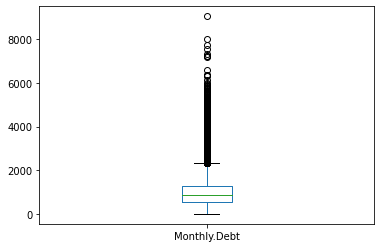

In [0]:
train['Monthly.Debt'].plot.box()

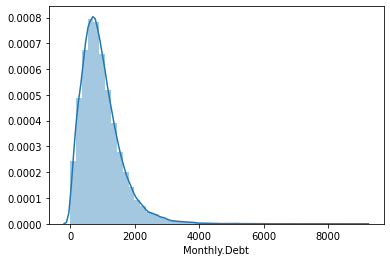

In [0]:
sns.distplot(train['Monthly.Debt'])

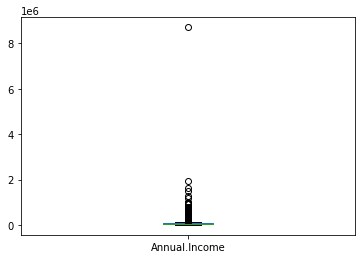

In [0]:
train['Annual.Income'].plot.box()

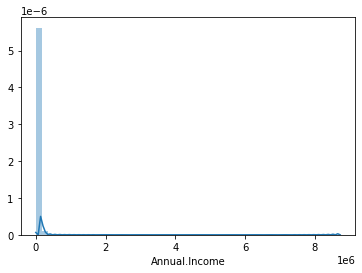

In [0]:
sns.distplot(train['Annual.Income'])

In [0]:
train['ratio']=train['Monthly.Debt']/(train['Annual.Income']/12)

In [0]:
test['ratio']=test['Monthly.Debt']/(test['Annual.Income']/12)

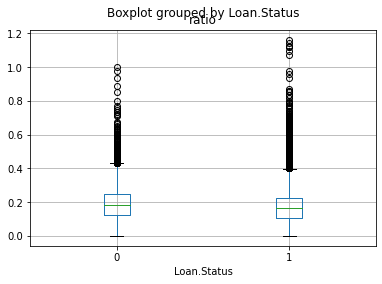

In [0]:
train.boxplot(column='', by = 'Loan.Status')

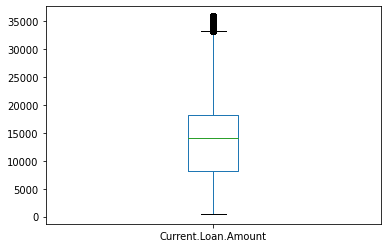

In [0]:
train['Current.Loan.Amount'].plot.box()

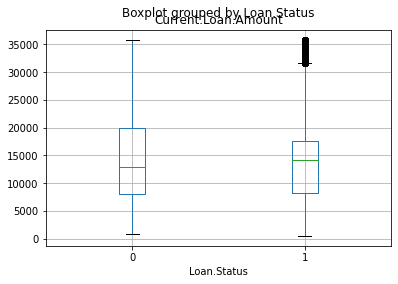

In [0]:
train.boxplot(column='Current.Loan.Amount', by = 'Loan.Status')

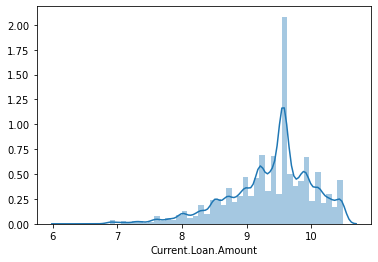

In [0]:
sns.distplot(np.log(train['Current.Loan.Amount']))

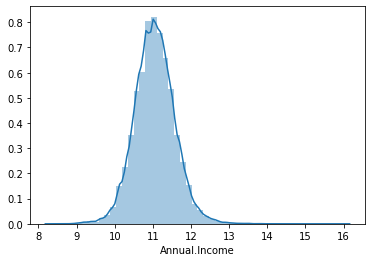

In [0]:
sns.distplot(np.log(train['Annual.Income'])

In [0]:
train.isnull().sum()

Loan.ID                         0
Current.Loan.Amount             0
Term                            0
Credit.Score                    0
Years.in.current.job            0
Home.Ownership                  0
Annual.Income                   0
Purpose                         0
Monthly.Debt                    0
Years.of.Credit.History         0
Months.since.last.delinquent    0
Number.of.Open.Accounts         0
Number.of.Credit.Problems       0
Current.Credit.Balance          0
Maximum.Open.Credit             0
Bankruptcies                    0
Tax.Liens                       0
Loan.Status                     0
ratio                           0
dtype: int64

In [0]:
test.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                        0
Years.in.current.job                0
Home.Ownership                      0
Annual.Income                       0
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent        0
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                        0
Tax.Liens                           0
Loan.Status                     23386
ratio                               0
dtype: int64

In [0]:
train=train.drop('Loan.ID',axis=1) 


In [0]:
test=test.drop('Loan.ID',axis=1) 

test=test.drop('Loan.Status',1)

In [0]:
test.head()

In [0]:
test=pd.get_dummies(test)

In [0]:
train.head()

,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status,ratio
0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1,0.190000
1,14124,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,32.0,8,0,22938,31250,0.0,0.0,1,0.235000
2,14124,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1,0.170001
3,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,32.0,8,1,11782,25951,1.0,0.0,1,0.301998
4,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1,0.085501


In [0]:
X = train.drop('Loan.Status',1) 
y = train['Loan.Status']

In [0]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_cv = model.predict(x_cv)

In [0]:
f1_score(y_cv, pred_cv, average='binary')

0.8639845550227315

In [0]:
accuracy_score(y_cv,pred_cv)

0.760552570990023

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = LogisticRegression(random_state=1)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)     
   f1score=f1_score(yvl, pred_test, average='binary')    
   print('accuracy_score',f1score)

accuracy_score 0.8632454664423257
accuracy_score 0.8632985932607374
accuracy_score 0.8632454664423257
accuracy_score 0.8632454664423256
accuracy_score 0.8633261662148266


In [0]:
pred_test = model.predict(test)

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=pred_test 
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('kfoldlogisticratio5.csv')

Random forest

In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = RandomForestClassifier(random_state=1, max_depth=19,n_estimators=141)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)   
   f1score=f1_score(yvl, pred_test, average='binary')    
   print('accuracy_score',f1score) 

accuracy_score 0.8820200261210274
accuracy_score 0.8821565116391618
accuracy_score 0.8821112668567838
accuracy_score 0.8818859521734921
accuracy_score 0.8820344227422162


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
   xtr,xvl = X.loc[train_index],X.loc[test_index]
   ytr,yvl = y[train_index],y[test_index]
   model = RandomForestClassifier(random_state=1, max_depth=19,n_estimators=141)
   model.fit(xtr, ytr)
   pred_test = model.predict(xvl)     
   f1score=f1_score(yvl, pred_test, average='binary')    
   print('accuracy_score',f1score) 

accuracy_score 0.8823586273562107
accuracy_score 0.8814707305273344
accuracy_score 0.8825347758887172
accuracy_score 0.8832477473113071
accuracy_score 0.883307573415765
accuracy_score 0.8820741027377381
accuracy_score 0.8826263800116212
accuracy_score 0.8819431004451326


KeyboardInterrupt: ignored

In [0]:
pred_test = model.predict(test)

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=pred_test 
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('kfoldrandomforestratio5.csv')

XGB

In [0]:
from xgboost import XGBClassifier

In [0]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]         
  model = XGBClassifier(n_estimators=141, max_depth=19,random_state=1)     
  model.fit(xtr, ytr)   
  pred_test = model.predict(xvl)    
  rocscore=roc_auc_score(yvl,pred_test) 
  print("rocscore",rocscore)
  score = accuracy_score(yvl,pred_test)     
  print('accuracy_score',score)

rocscore 0.6202344782401084
accuracy_score 0.7946714908313461
rocscore 0.6207331771255548
accuracy_score 0.7963160924266096
rocscore 0.6225708579952842
accuracy_score 0.7980429241016364
rocscore 0.6184916627839718
accuracy_score 0.7934380396348985
rocscore 0.6148131180616292
accuracy_score 0.7910361842105263


In [0]:
pred_test = model.predict(test)

In [0]:
submission=pd.read_csv("SubmissionSample.csv")
submission['Loan.Status']=pred_test 
submission['Loan.ID']=original_test['Loan.ID']

In [0]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('kXGB5.csv')